<a href="https://colab.research.google.com/github/GeetRakala/geetrakala.github.io/blob/master/stock_correlations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Performance of custom portfolios against Nifty Fifty index.

* We will be working with a subset of 28 stocks from Nifty 50 for which historical data for the last five years is available.
* We will then create a few custom portfolios (using these 28 stocks) and compare its performance with an equally weighted portfolio (of these 28 stocks).
* We will also compare perfomance with the Nifty 50 index.
* A more comprehensive production ready strategy will be then combine insights from these various portfolio performances. This is beyond the scope of this simple data assignment.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# define a list of NIFTY stocks
nifty_tickers = ['BHARTIARTL.NS', 'LTIM.NS', 'HDFCLIFE.NS', 'NTPC.NS', 'MARUTI.NS',
 'NESTLEIND.NS', 'BAJFINANCE.NS', 'KOTAKBANK.NS', 'TATASTEEL.NS',
 'ONGC.NS', 'BAJAJ-AUTO.NS', 'LT.NS', 'ITC.NS', 'TCS.NS', 'BRITANNIA.NS',
 'SHRIRAMFIN.NS', 'ADANIENT.NS', 'CIPLA.NS', 'WIPRO.NS', 'INDUSINDBK.NS',
 'ULTRACEMCO.NS', 'TATACONSUM.NS', 'BAJAJFINSV.NS', 'RELIANCE.NS',
 'HEROMOTOCO.NS', 'COALINDIA.NS', 'TITAN.NS', 'HINDALCO.NS',
 'APOLLOHOSP.NS']

# five year time period
start_date = '2018-01-01'
end_date = '2023-01-01'

# fetching historical data
nifty_data = {}
for ticker in nifty_tickers:
    stock_data = yf.download(ticker, start=start_date, end=end_date, progress=False)['Adj Close']
    nifty_data[ticker] = stock_data

nifty_df = pd.DataFrame(nifty_data)
nifty_df.head()

,BHARTIARTL.NS,LTIM.NS,HDFCLIFE.NS,NTPC.NS,MARUTI.NS,NESTLEIND.NS,BAJFINANCE.NS,KOTAKBANK.NS,TATASTEEL.NS,ONGC.NS,...,INDUSINDBK.NS,ULTRACEMCO.NS,TATACONSUM.NS,BAJAJFINSV.NS,RELIANCE.NS,HEROMOTOCO.NS,COALINDIA.NS,TITAN.NS,HINDALCO.NS,APOLLOHOSP.NS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,457.364899,1043.743164,383.123627,104.481438,8980.137695,703.960571,1691.038208,995.892517,26.503380,132.489166,...,1547.809937,4132.458984,295.084137,515.667847,806.939636,2992.284668,147.914398,821.534302,259.118774,1175.477417
2018-01-02,447.531403,1047.023804,388.875702,105.872139,8889.097656,703.991760,1690.058350,999.129272,26.763937,135.588776,...,1566.968628,4128.818848,293.433807,508.613556,808.181396,2988.093750,149.800415,814.499023,259.835480,1165.116211
2018-01-03,448.960968,1024.971558,379.190613,104.777344,8761.213867,703.683044,1680.895752,996.041931,26.971277,133.246857,...,1553.910034,4177.027344,293.480957,508.449066,811.419006,2997.152832,150.798889,825.244568,264.231384,1150.013916
2018-01-04,453.119598,1030.211060,392.317047,104.806915,8732.977539,704.502136,1718.819702,996.340698,27.899742,137.414047,...,1569.494751,4219.312012,294.471191,504.769867,816.297363,2984.143311,154.099442,860.517334,267.384979,1133.983154
2018-01-05,467.848175,1010.118042,400.183075,105.043633,8777.263672,703.383118,1778.106079,998.979919,28.283236,136.690796,...,1618.678345,4268.151367,295.131317,511.215912,818.914001,2988.732178,154.626389,876.707947,264.135803,1169.368164


## We will work with daily returns to understand the performance of the stocks in our portfolio.

$\textrm{Return} = \frac{\textrm{Current Price} \; - \; \textrm{Previous Price}}{\textrm{Previous Price}}$

In [ ]:
# Calculate the daily returns.
nifty_returns = nifty_df.pct_change()
nifty_returns.dropna(inplace=True)
nifty_returns.head()

,BHARTIARTL.NS,LTIM.NS,HDFCLIFE.NS,NTPC.NS,MARUTI.NS,NESTLEIND.NS,BAJFINANCE.NS,KOTAKBANK.NS,TATASTEEL.NS,ONGC.NS,...,INDUSINDBK.NS,ULTRACEMCO.NS,TATACONSUM.NS,BAJAJFINSV.NS,RELIANCE.NS,HEROMOTOCO.NS,COALINDIA.NS,TITAN.NS,HINDALCO.NS,APOLLOHOSP.NS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,-0.021500,0.003143,0.015014,0.013311,-0.010138,0.000044,-0.000579,0.003250,0.009831,0.023395,...,0.012378,-0.000881,-0.005593,-0.013680,0.001539,-0.001401,0.012751,-0.008564,0.002766,-0.008814
2018-01-03,0.003194,-0.021062,-0.024905,-0.010341,-0.014387,-0.000439,-0.005421,-0.003090,0.007747,-0.017272,...,-0.008334,0.011676,0.000161,-0.000323,0.004006,0.003032,0.006665,0.013193,0.016918,-0.012962
2018-01-04,0.009263,0.005112,0.034617,0.000282,-0.003223,0.001164,0.022562,0.000300,0.034424,0.031274,...,0.010029,0.010123,0.003374,-0.007236,0.006012,-0.004341,0.021887,0.042742,0.011935,-0.013940
2018-01-05,0.032505,-0.019504,0.020050,0.002259,0.005071,-0.001588,0.034492,0.002649,0.013745,-0.005263,...,0.031337,0.011575,0.002242,0.012770,0.003205,0.001538,0.003420,0.018815,-0.012152,0.031204
2018-01-08,-0.043796,0.008615,0.037101,0.000845,0.001601,0.010742,0.012318,0.003041,-0.002530,-0.005291,...,0.012778,0.006711,0.014859,0.018343,0.005741,0.011243,0.031211,0.018028,-0.000904,-0.013040


In [ ]:
# A useful metric in performance analysis is the correlation matrix between the 28 stocks.
correlation_matrix = nifty_returns.corr()
correlation_matrix.head()

,BHARTIARTL.NS,LTIM.NS,HDFCLIFE.NS,NTPC.NS,MARUTI.NS,NESTLEIND.NS,BAJFINANCE.NS,KOTAKBANK.NS,TATASTEEL.NS,ONGC.NS,...,INDUSINDBK.NS,ULTRACEMCO.NS,TATACONSUM.NS,BAJAJFINSV.NS,RELIANCE.NS,HEROMOTOCO.NS,COALINDIA.NS,TITAN.NS,HINDALCO.NS,APOLLOHOSP.NS
BHARTIARTL.NS,1.000000,0.192315,0.292699,0.254089,0.317144,0.185437,0.326800,0.272728,0.164786,0.227048,...,0.306328,0.368179,0.303782,0.343840,0.286966,0.285840,0.179733,0.255022,0.346469,0.181182
LTIM.NS,0.192315,1.000000,0.233156,0.209922,0.216325,0.230263,0.240916,0.179938,0.131054,0.162918,...,0.165185,0.264740,0.313160,0.269824,0.253521,0.227923,0.170939,0.223993,0.272114,0.235106
HDFCLIFE.NS,0.292699,0.233156,1.000000,0.275787,0.389382,0.346585,0.402920,0.404243,0.193736,0.196450,...,0.367761,0.388599,0.386105,0.395508,0.388794,0.378606,0.188542,0.321970,0.342762,0.265538
NTPC.NS,0.254089,0.209922,0.275787,1.000000,0.327113,0.190942,0.307761,0.282348,0.212517,0.440127,...,0.264919,0.324459,0.307262,0.317539,0.251104,0.271273,0.493034,0.292885,0.396996,0.170364
MARUTI.NS,0.317144,0.216325,0.389382,0.327113,1.000000,0.335277,0.479048,0.411143,0.241217,0.292807,...,0.358130,0.484864,0.404398,0.462866,0.405602,0.563590,0.283841,0.455141,0.420001,0.274337


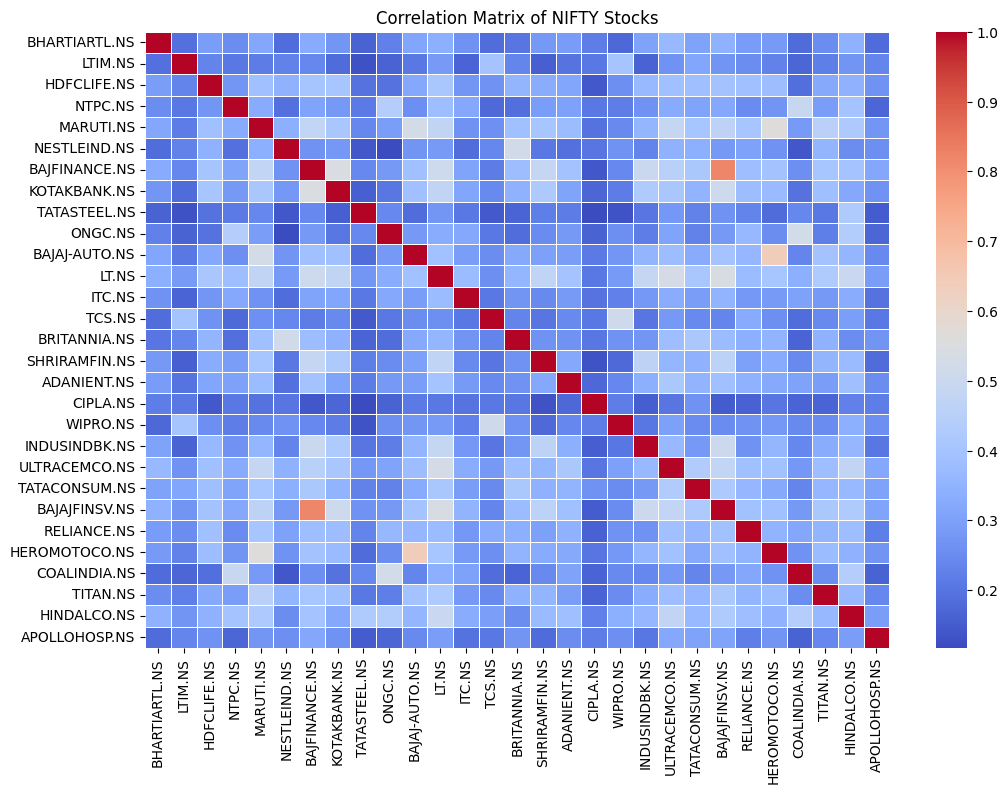

In [ ]:
# The correlation matrix can be represented as a heat map
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of NIFTY Stocks')
plt.show()

---
---
## Stratergy 1: Minimum Variance Portfolio.

* Calculate covariance matrix of the returns.
* Opimisation procedure for weight allocation to minimise portfolio variance.
---
---

In [ ]:
from scipy.optimize import minimize

cov_matrix = nifty_returns.cov()

def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
bounds = [(0, 1) for _ in range(len(nifty_tickers))]
initial_weights = np.ones(len(nifty_tickers)) / len(nifty_tickers)

# Optimize the portfolio weights to minimize variance
result = minimize(portfolio_variance, initial_weights, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)
optimal_weights = result.x

portfolio_df = pd.DataFrame({'Stock': nifty_tickers, 'Weight': optimal_weights})
portfolio_df.sort_values(by='Weight', ascending=False, inplace=True)
portfolio_df

,Stock,Weight
0,BHARTIARTL.NS,0.034483
15,SHRIRAMFIN.NS,0.034483
27,HINDALCO.NS,0.034483
26,TITAN.NS,0.034483
25,COALINDIA.NS,0.034483
24,HEROMOTOCO.NS,0.034483
23,RELIANCE.NS,0.034483
22,BAJAJFINSV.NS,0.034483
21,TATACONSUM.NS,0.034483
20,ULTRACEMCO.NS,0.034483


In [ ]:
# The covariance matrix values
cov_matrix.head()

,BHARTIARTL.NS,LTIM.NS,HDFCLIFE.NS,NTPC.NS,MARUTI.NS,NESTLEIND.NS,BAJFINANCE.NS,KOTAKBANK.NS,TATASTEEL.NS,ONGC.NS,...,INDUSINDBK.NS,ULTRACEMCO.NS,TATACONSUM.NS,BAJAJFINSV.NS,RELIANCE.NS,HEROMOTOCO.NS,COALINDIA.NS,TITAN.NS,HINDALCO.NS,APOLLOHOSP.NS
BHARTIARTL.NS,0.000451,0.000097,0.000124,0.000095,0.000138,0.000061,0.000179,0.000111,0.000134,0.000117,...,0.000209,0.000147,0.000134,0.000174,0.000122,0.000120,0.000077,0.000108,0.000198,0.000092
LTIM.NS,0.000097,0.000566,0.000111,0.000088,0.000105,0.000084,0.000148,0.000082,0.000119,0.000094,...,0.000126,0.000118,0.000155,0.000153,0.000120,0.000108,0.000082,0.000106,0.000174,0.000133
HDFCLIFE.NS,0.000124,0.000111,0.000400,0.000097,0.000160,0.000107,0.000208,0.000155,0.000149,0.000095,...,0.000236,0.000146,0.000160,0.000189,0.000155,0.000150,0.000076,0.000128,0.000185,0.000127
NTPC.NS,0.000095,0.000088,0.000097,0.000307,0.000117,0.000052,0.000139,0.000095,0.000143,0.000187,...,0.000149,0.000107,0.000112,0.000133,0.000088,0.000094,0.000175,0.000102,0.000187,0.000071
MARUTI.NS,0.000138,0.000105,0.000160,0.000117,0.000420,0.000106,0.000253,0.000161,0.000189,0.000146,...,0.000236,0.000186,0.000172,0.000226,0.000166,0.000229,0.000118,0.000185,0.000232,0.000134


### The covariance values are very small. Beacuse of which all stocks are equally weighted. We can correct for this using a rescaled covariance matrix.

In [ ]:
scaled_nifty_returns = nifty_returns * 100
scaled_cov_matrix = scaled_nifty_returns.cov()
result_scaled = minimize(portfolio_variance, initial_weights, args=(scaled_cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)
optimal_weights_scaled = result_scaled.x

portfolio_df_scaled = pd.DataFrame({'Stock': nifty_tickers, 'Weight': optimal_weights_scaled})
portfolio_df_scaled.sort_values(by='Weight', ascending=False, inplace=True)
portfolio_df_scaled

,Stock,Weight
5,NESTLEIND.NS,1.730969e-01
13,TCS.NS,1.479017e-01
17,CIPLA.NS,1.331703e-01
12,ITC.NS,1.209819e-01
3,NTPC.NS,9.691372e-02
14,BRITANNIA.NS,8.513323e-02
10,BAJAJ-AUTO.NS,7.421995e-02
25,COALINDIA.NS,5.207893e-02
0,BHARTIARTL.NS,4.168611e-02
18,WIPRO.NS,3.570088e-02


### Let us compare this strategy with equal weight strategy and nifty 50 index.

[*********************100%***********************]  1 of 1 completed


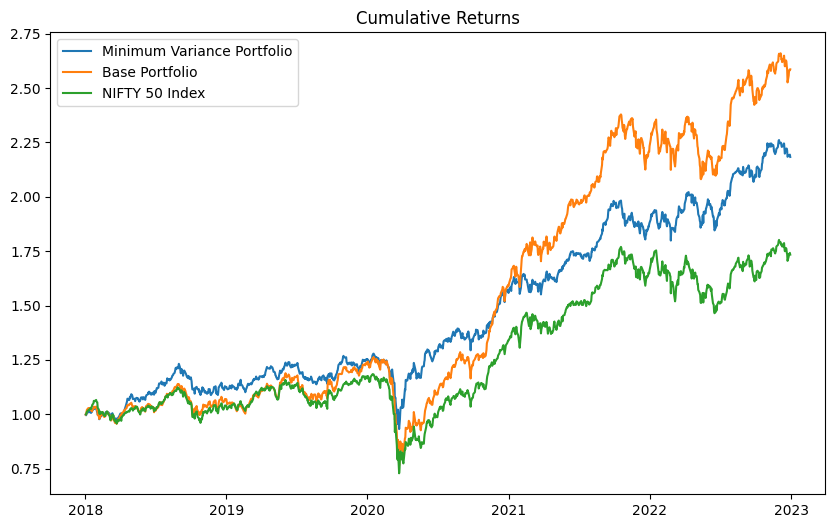

In [ ]:
portfolio_returns = np.dot(nifty_returns, optimal_weights_scaled)

portfolio_returns_df = pd.DataFrame(portfolio_returns, index=nifty_returns.index, columns=['Minimum Variance Portfolio'])

# Cumulative returns
mvp_cumulative_return = (1 + portfolio_returns_df).cumprod()

# Calculate cumulative returns for the base NIFTY Portfolio (equal weights for 28 stocks)
full_portfolio_weights = np.ones(len(nifty_tickers)) / len(nifty_tickers)
full_portfolio_returns = np.dot(nifty_returns, full_portfolio_weights)
full_portfolio_returns_df = pd.DataFrame(full_portfolio_returns, index=nifty_returns.index, columns=['Base Portfolio'])
full_portfolio_cumulative_return = (1 + full_portfolio_returns_df).cumprod()

# Fetch NIFTY 50 Index data to compare
nifty_index = yf.download('^NSEI', start=start_date, end=end_date)['Adj Close']
nifty_index_returns = nifty_index.pct_change().dropna()
nifty_index_cumulative_return = (1 + nifty_index_returns).cumprod()


# Comparision plot of cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(mvp_cumulative_return, label='Minimum Variance Portfolio')
plt.plot(full_portfolio_cumulative_return, label='Base Portfolio')
plt.plot(nifty_index_cumulative_return, label='NIFTY 50 Index')
plt.title('Cumulative Returns')
plt.legend()
plt.show()

### As we can see, this strategy doesnot always seem to work. It only worked in a small period following a big dip in the beginning of 2020. Let us move on to others

---
---
## Stratergy 2: Risk Parity Portfolio.

* Allocate weights such that each stock contributes equally to portfolio risk.
* Can be done by assigning weights inversly proportional to each stocks variance/volatility.
---
---

In [ ]:
stock_volatility = nifty_returns.std()

inv_vol_weights = 1 / stock_volatility
inv_vol_weights /= inv_vol_weights.sum()  # normalise

portfolio_df_risk_parity = pd.DataFrame({'Stock': nifty_tickers, 'Weight': inv_vol_weights})
portfolio_df_risk_parity.sort_values(by='Weight', ascending=False, inplace=True)
portfolio_df_risk_parity

,Stock,Weight
NESTLEIND.NS,NESTLEIND.NS,0.046609
BRITANNIA.NS,BRITANNIA.NS,0.044243
TCS.NS,TCS.NS,0.043685
ITC.NS,ITC.NS,0.042861
BAJAJ-AUTO.NS,BAJAJ-AUTO.NS,0.041791
NTPC.NS,NTPC.NS,0.040966
CIPLA.NS,CIPLA.NS,0.040546
LT.NS,LT.NS,0.039804
WIPRO.NS,WIPRO.NS,0.039648
ULTRACEMCO.NS,ULTRACEMCO.NS,0.038309


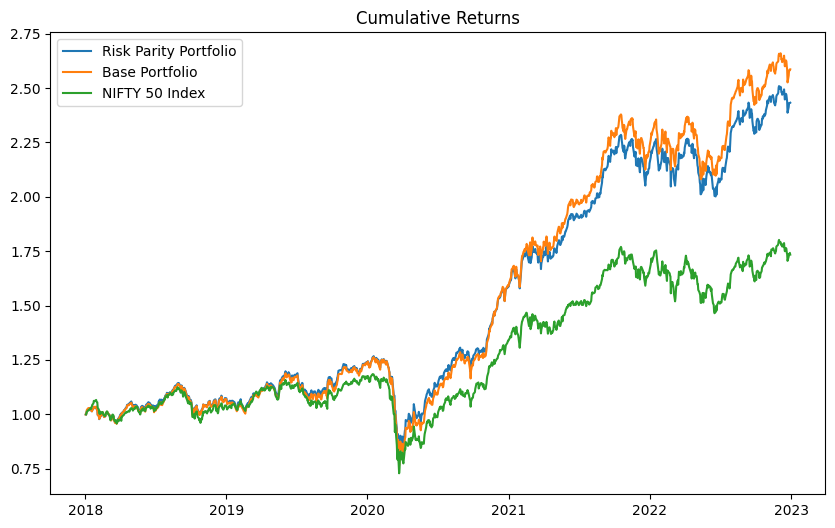

In [ ]:
portfolio_returns = np.dot(nifty_returns, inv_vol_weights)

portfolio_returns_df = pd.DataFrame(portfolio_returns, index=nifty_returns.index, columns=['Risk Parity Portfolio'])

# Cumulative returns
rpp_cumulative_return = (1 + portfolio_returns_df).cumprod()

# Comparision plot of cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(rpp_cumulative_return, label='Risk Parity Portfolio')
plt.plot(full_portfolio_cumulative_return, label='Base Portfolio')
plt.plot(nifty_index_cumulative_return, label='NIFTY 50 Index')
plt.title('Cumulative Returns')
plt.legend()
plt.show()

### This strategy mostly under performs compared to the base portfolio. Let us proceed with other strategies.


---
---
## Stratergy 3: Sector Weighted Portfolio.

* Group stocks by sectors.
* Assigning weights to each sector based on performance expectations.
---
---

In [ ]:
sector_stocks = { 'BHARTIARTL.NS': 'Telecom', 'LTIM.NS': 'IT', 'HDFCLIFE.NS': 'Financials', 'NTPC.NS': 'Utilities','MARUTI.NS': 'Automobile','NESTLEIND.NS': 'Consumer Goods',
                 'BAJFINANCE.NS': 'Financials','KOTAKBANK.NS': 'Financials','TATASTEEL.NS': 'Materials','ONGC.NS': 'Energy','BAJAJ-AUTO.NS': 'Automobile','LT.NS': 'Industrials',
                  'ITC.NS': 'Consumer Goods','TCS.NS': 'IT','BRITANNIA.NS': 'Consumer Goods','SHRIRAMFIN.NS': 'Financials','ADANIENT.NS': 'Energy','CIPLA.NS': 'Healthcare',
                  'WIPRO.NS': 'IT','INDUSINDBK.NS': 'Financials','ULTRACEMCO.NS': 'Materials','TATACONSUM.NS': 'Consumer Goods','BAJAJFINSV.NS': 'Financials',
                  'RELIANCE.NS': 'Energy','HEROMOTOCO.NS': 'Automobile','COALINDIA.NS': 'Energy', 'TITAN.NS': 'Consumer Goods', 'HINDALCO.NS': 'Materials',
                  'APOLLOHOSP.NS': 'Healthcare'}
sector_weights = { 'IT': 0.25, 'Energy': 0.20, 'Telecom': 0.05, 'Financials': 0.20, 'Utilities': 0.05, 'Automobile': 0.10, 'Consumer Goods': 0.10, 'Industrials': 0.05,
                  'Materials': 0.05, 'Healthcare': 0.05 }

# Assign sector weights to each stock
sector_based_weights = pd.Series({stock: sector_weights[sector_stocks[stock]] for stock in sector_stocks})
sector_based_weights /= sector_based_weights.sum()

portfolio_df_sector_weighted = pd.DataFrame({'Stock': nifty_tickers, 'Weight': inv_vol_weights})
portfolio_df_sector_weighted.sort_values(by='Weight', ascending=False, inplace=True)
portfolio_df_sector_weighted


,Stock,Weight
NESTLEIND.NS,NESTLEIND.NS,0.046609
BRITANNIA.NS,BRITANNIA.NS,0.044243
TCS.NS,TCS.NS,0.043685
ITC.NS,ITC.NS,0.042861
BAJAJ-AUTO.NS,BAJAJ-AUTO.NS,0.041791
NTPC.NS,NTPC.NS,0.040966
CIPLA.NS,CIPLA.NS,0.040546
LT.NS,LT.NS,0.039804
WIPRO.NS,WIPRO.NS,0.039648
ULTRACEMCO.NS,ULTRACEMCO.NS,0.038309


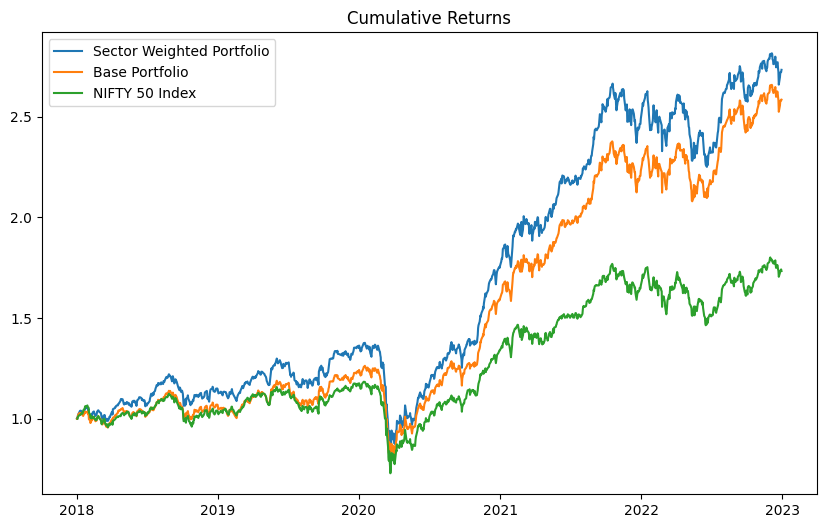

In [ ]:
portfolio_returns = np.dot(nifty_returns, sector_based_weights)

portfolio_returns_df = pd.DataFrame(portfolio_returns, index=nifty_returns.index, columns=['Sector Weighted Portfolio'])

# Cumulative returns
swp_cumulative_return = (1 + portfolio_returns_df).cumprod()

# Comparision plot of cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(swp_cumulative_return, label='Sector Weighted Portfolio')
plt.plot(full_portfolio_cumulative_return, label='Base Portfolio')
plt.plot(nifty_index_cumulative_return, label='NIFTY 50 Index')
plt.title('Cumulative Returns')
plt.legend()
plt.show()

### This simple strategy always out performs the base portfolio. Let us proceed with other strategies.


---
---
## Stratergy 3: Thematic Basket Portfolio.

* Manually select stocks based on a theme.
* Assigning equal weights to each stock in this theme.
---
---

In [ ]:
# We will work with the theme of digitally tranforming landscape of India
thematic_stocks = ['TCS.NS', 'BHARTIARTL.NS', 'WIPRO.NS', 'RELIANCE.NS']
thematic_returns = nifty_returns[thematic_stocks]

thematic_weights = pd.Series(1 / len(thematic_stocks), index=thematic_stocks)

portfolio_df_thematic = pd.DataFrame({'Stock': thematic_stocks, 'Weight': thematic_weights})
portfolio_df_thematic

,Stock,Weight
TCS.NS,TCS.NS,0.25
BHARTIARTL.NS,BHARTIARTL.NS,0.25
WIPRO.NS,WIPRO.NS,0.25
RELIANCE.NS,RELIANCE.NS,0.25


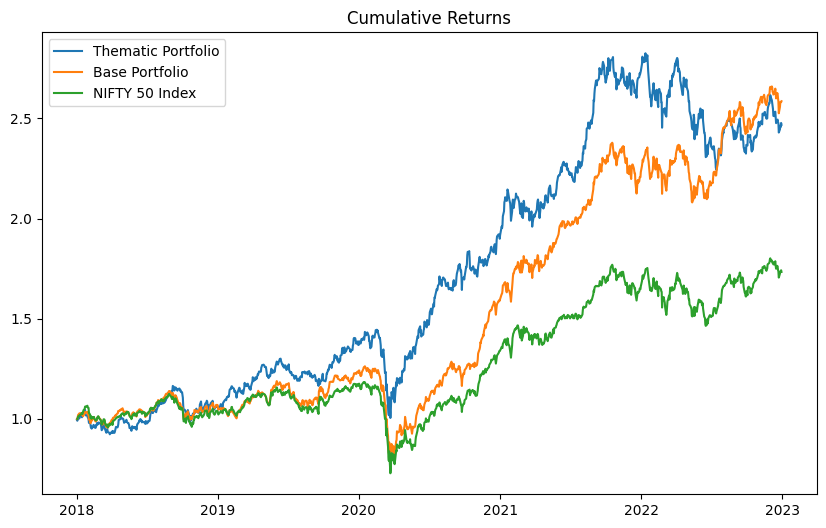

In [ ]:
# Calculate cumulative returns for thematic portfolio
thematic_portfolio_returns = np.dot(thematic_returns, thematic_weights)
thematic_portfolio_returns_df = pd.DataFrame(thematic_portfolio_returns, index=thematic_returns.index, columns=['Portfolio Return'])
thematic_portfolio_cumulative_return = (1 + thematic_portfolio_returns_df).cumprod()

# Comparision plot of cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(thematic_portfolio_cumulative_return, label='Thematic Portfolio')
plt.plot(full_portfolio_cumulative_return, label='Base Portfolio')
plt.plot(nifty_index_cumulative_return, label='NIFTY 50 Index')
plt.title('Cumulative Returns')
plt.legend()
plt.show()


### This simple strategy has out performed the base portfolio mainly during the COVID era when all of us were heavily reliant on digital technologies and other sectors had come to a standstill. Let us proceed with other strategies.

---
---
## Stratergy 4: Community Weighted Portfolio.

* Construct a graph of communities
* Assign stocks to communities based on their correlations.
* Assign weights to communities based on various centrality measures.

### For this strategy, we will mainly be implementing ideas discussed in the following blog posts:

1. https://medium.com/swlh/community-detection-network-analysis-of-the-stock-market-in-python-r-part-1-a8a3366dc5a5
2. https://medium.com/analytics-vidhya/community-detection-network-analysis-of-the-stock-market-in-python-r-part-2-9b5a5dbe5d5b
3. https://medium.com/@akiboy96/community-detection-network-analysis-of-the-stock-market-in-python-r-part-3-ca4e0fbb8ca9

---
---

In [ ]:
!pip install python-igraph
!pip install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.1 MB/s eta 0:00:00


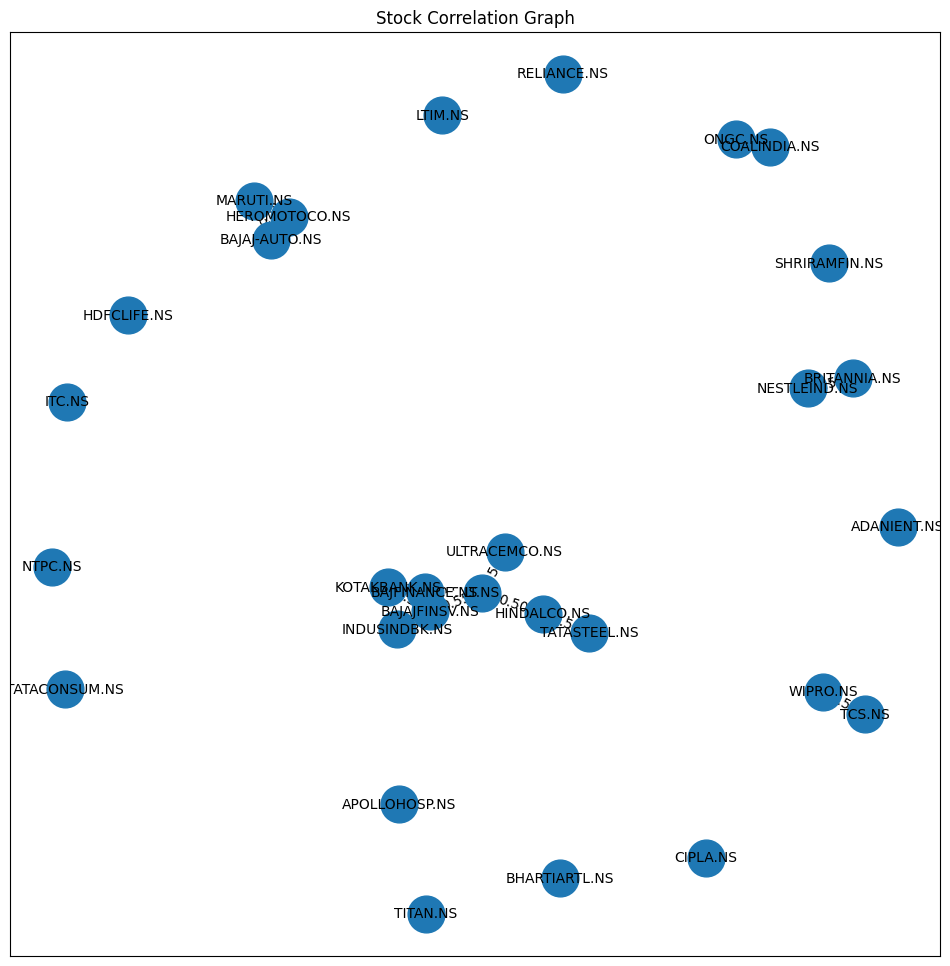

In [ ]:
import networkx as nx
import igraph as ig
import leidenalg as la

log_returns = np.log(nifty_df / nifty_df.shift(1))
log_returns = log_returns.dropna()
corr_matrix = log_returns.corr()

# Create the correlation graph from the correlation matrix
threshold = 0.5
G = nx.Graph()
companies = corr_matrix.columns
G.add_nodes_from(companies)

for i in range(len(companies)):
    for j in range(i + 1, len(companies)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            G.add_edge(companies[i], companies[j], weight=abs(corr_value))

# Plot the correlation graph
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=700)
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight'] * 10 for (u, v, d) in edges])
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
edge_labels = {(u, v): f'{d["weight"]:.2f}' for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Stock Correlation Graph")
plt.show()

In [ ]:
# Convert the NetworkX graph to igraph format for community detection
G_igraph = ig.Graph()
G_igraph.add_vertices(list(G.nodes))
G_igraph.add_edges([(u, v) for u, v in G.edges()])
G_igraph.es['weight'] = [d['weight'] for u, v, d in G.edges(data=True)]

# Detect communities using the Leiden algorithm
partition = la.find_partition(G_igraph, la.ModularityVertexPartition, weights=G_igraph.es['weight'])

# Map the detected communities back to NetworkX graph nodes
node_map = {i: node for i, node in enumerate(G.nodes)}
community_membership = {node_map[i]: comm for i, comm in enumerate(partition.membership)}

# Print the communities and the stocks in each community
communities_dict = {}
for node, community in community_membership.items():
    if community not in communities_dict:
        communities_dict[community] = []
    communities_dict[community].append(node)

for community, stocks in communities_dict.items():
    print(f"Community {community + 1}:")
    print(", ".join(stocks))
    print()

Community 7:
BHARTIARTL.NS

Community 8:
LTIM.NS

Community 9:
HDFCLIFE.NS

Community 10:
NTPC.NS

Community 3:
MARUTI.NS, BAJAJ-AUTO.NS, HEROMOTOCO.NS

Community 4:
NESTLEIND.NS, BRITANNIA.NS

Community 2:
BAJFINANCE.NS, KOTAKBANK.NS, INDUSINDBK.NS, BAJAJFINSV.NS

Community 1:
TATASTEEL.NS, LT.NS, ULTRACEMCO.NS, HINDALCO.NS

Community 6:
ONGC.NS, COALINDIA.NS

Community 11:
ITC.NS

Community 5:
TCS.NS, WIPRO.NS

Community 12:
SHRIRAMFIN.NS

Community 13:
ADANIENT.NS

Community 14:
CIPLA.NS

Community 15:
TATACONSUM.NS

Community 16:
RELIANCE.NS

Community 17:
TITAN.NS

Community 18:
APOLLOHOSP.NS



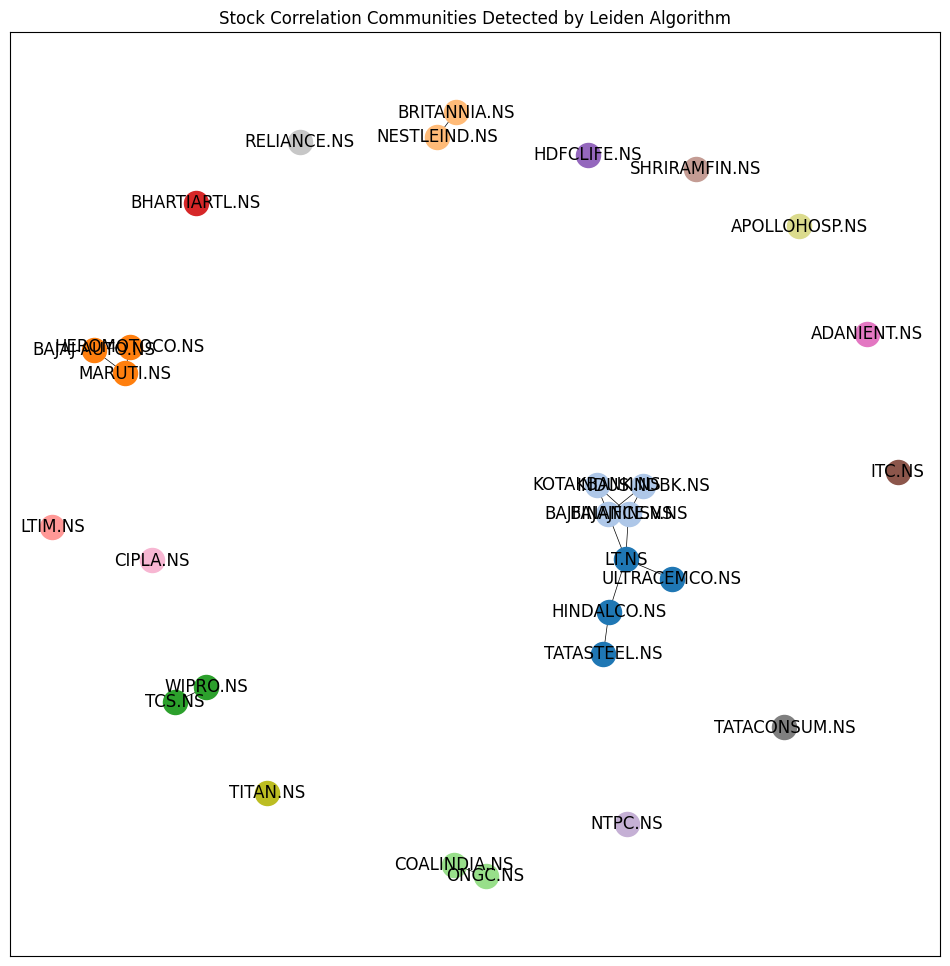

In [ ]:
# Plot the communities on the graph
colors = plt.get_cmap('tab20')
num_communities = max(partition.membership) + 1
pos = nx.spring_layout(G)

plt.figure(figsize=(12, 12))
for community in range(num_communities):
    nodelist = [node for node, comm in community_membership.items() if comm == community]
    nx.draw_networkx_nodes(
        G, pos, nodelist=nodelist,
        node_color=[colors(community)],
        node_size=300, label=f'Community {community + 1}'
    )

nx.draw_networkx_edges(G, pos, width=0.5)
nx.draw_networkx_labels(G, pos)
plt.title("Stock Correlation Communities Detected by Leiden Algorithm")
plt.show()

In [ ]:
# Calculate degree, betweenness, closeness, and eigenvector centralities
degree_centrality = G_igraph.degree()
betweenness_centrality = G_igraph.betweenness(weights='weight')
closeness_centrality = G_igraph.closeness()
eigenvector_centrality = G_igraph.eigenvector_centrality(weights='weight')

centralities = {
    'Degree Centrality': np.array(degree_centrality),
    'Betweenness Centrality': np.array(betweenness_centrality),
    'Closeness Centrality': np.array(closeness_centrality),
    'Eigenvector Centrality': np.array(eigenvector_centrality)
}

centrality_index = np.mean(
    [centralities['Degree Centrality'], centralities['Betweenness Centrality'],
     centralities['Closeness Centrality'], centralities['Eigenvector Centrality']],
    axis=0
)
stock_names = G_igraph.vs['name']
centrality_df = pd.DataFrame({
    'Stock': stock_names,
    'Centrality Index': centrality_index
})
print(centrality_df)

            Stock  Centrality Index
0   BHARTIARTL.NS               NaN
1         LTIM.NS               NaN
2     HDFCLIFE.NS               NaN
3         NTPC.NS               NaN
4       MARUTI.NS          0.750000
5    NESTLEIND.NS          0.500000
6   BAJFINANCE.NS          2.408657
7    KOTAKBANK.NS          0.756488
8    TATASTEEL.NS          0.353043
9         ONGC.NS          0.500000
10  BAJAJ-AUTO.NS          0.750000
11          LT.NS          4.852651
12         ITC.NS               NaN
13         TCS.NS          0.500000
14   BRITANNIA.NS          0.500000
15  SHRIRAMFIN.NS               NaN
16    ADANIENT.NS               NaN
17       CIPLA.NS               NaN
18       WIPRO.NS          0.500000
19  INDUSINDBK.NS          0.752163
20  ULTRACEMCO.NS          0.411899
21  TATACONSUM.NS               NaN
22  BAJAJFINSV.NS          2.659091
23    RELIANCE.NS               NaN
24  HEROMOTOCO.NS          0.750000
25   COALINDIA.NS          0.500000
26       TITAN.NS           

### Some of the stocks have NaN as centrality index. These are stocks that belong to unique communities (a community formed of only that stock). We will adopt a weighting strategy as follows: After calculating the centrality index, of a total of $n$ stocks,let us $(n-x)$ stocks have some finite centrality index and $x$ stocks have centrality index NaN. We want each of the NaN stock to have weight $1/(x+1)$. And the remaining $n-x$ stocks should share the weight $1/(x+1)$ inversely proportional to their centrality index.
---
###The reason behind this weighting strategy is realising that the communities follow similar grouping as previously defined sectors. Andstocks that dont belong to communities seem to outperform other stocks. And performance of the sectors seem to be inversely proprtional to the centrality index.

In [ ]:
# Identify NaN and non-NaN centrality stocks
non_nan_mask = centrality_df['Centrality Index'].notna()
nan_mask = centrality_df['Centrality Index'].isna()

x = centrality_df['Centrality Index'].isna().sum()  # Number of NaN stocks
n_x = len(centrality_df) - x  # Number of non-NaN stocks

centrality_df.loc[nan_mask, 'Weight'] = 1 / (x + 1)

remaining_weight = 1 / (x + 1)

centrality_df.loc[non_nan_mask, 'Inverse Centrality'] = 1 / centrality_df.loc[non_nan_mask, 'Centrality Index']

inverse_sum = centrality_df.loc[non_nan_mask, 'Inverse Centrality'].sum()

centrality_df.loc[non_nan_mask, 'Weight'] = remaining_weight * centrality_df.loc[non_nan_mask, 'Inverse Centrality'] / inverse_sum

centrality_df = centrality_df[['Stock', 'Centrality Index', 'Inverse Centrality', 'Weight']]

centrality_df.sort_values(by='Weight', ascending=False, inplace=True)
print(centrality_df)

            Stock  Centrality Index  Inverse Centrality    Weight
0   BHARTIARTL.NS               NaN                 NaN  0.076923
12         ITC.NS               NaN                 NaN  0.076923
26       TITAN.NS               NaN                 NaN  0.076923
23    RELIANCE.NS               NaN                 NaN  0.076923
21  TATACONSUM.NS               NaN                 NaN  0.076923
17       CIPLA.NS               NaN                 NaN  0.076923
16    ADANIENT.NS               NaN                 NaN  0.076923
15  SHRIRAMFIN.NS               NaN                 NaN  0.076923
1         LTIM.NS               NaN                 NaN  0.076923
28  APOLLOHOSP.NS               NaN                 NaN  0.076923
3         NTPC.NS               NaN                 NaN  0.076923
2     HDFCLIFE.NS               NaN                 NaN  0.076923
8    TATASTEEL.NS          0.353043            2.832519  0.008589
20  ULTRACEMCO.NS          0.411899            2.427780  0.007362
14   BRITA

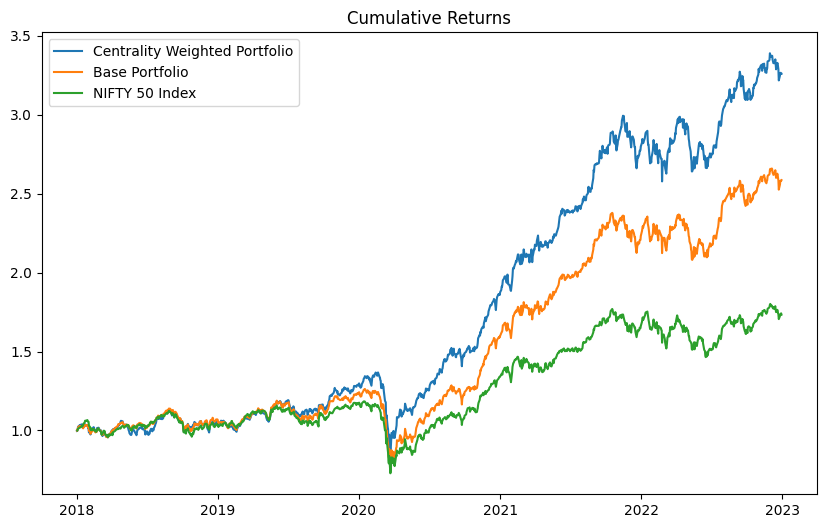

In [ ]:
matching_stocks = nifty_returns.columns.isin(centrality_df['Stock'])
nifty_returns_ordered = nifty_returns.loc[:, matching_stocks]
centrality_weights_ordered = centrality_df.set_index('Stock').loc[nifty_returns_ordered.columns]['Weight'].values

portfolio_returns = np.dot(nifty_returns_ordered, centrality_weights_ordered)
portfolio_returns_df = pd.DataFrame(portfolio_returns, index=nifty_returns_ordered.index, columns=['Centrality Weighted Portfolio'])
centrality_cumulative_return = (1 + portfolio_returns_df).cumprod()

plt.figure(figsize=(10, 6))
plt.plot(centrality_cumulative_return, label='Centrality Weighted Portfolio')
plt.plot(full_portfolio_cumulative_return, label='Base Portfolio')
plt.plot(nifty_index_cumulative_return, label='NIFTY 50 Index')
plt.title('Cumulative Returns')
plt.legend()
plt.show()

## This performs much better than all the previous portfolios.  Let us now plot everything together:

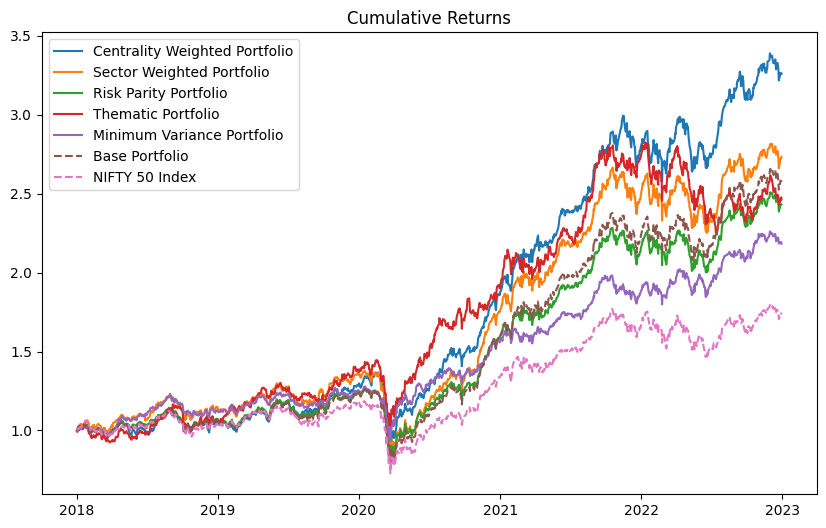

In [ ]:
# Comparision plot of cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(centrality_cumulative_return, label='Centrality Weighted Portfolio')
plt.plot(swp_cumulative_return, label='Sector Weighted Portfolio')
plt.plot(rpp_cumulative_return, label='Risk Parity Portfolio')
plt.plot(thematic_portfolio_cumulative_return, label='Thematic Portfolio')
plt.plot(mvp_cumulative_return, label='Minimum Variance Portfolio')
plt.plot(full_portfolio_cumulative_return,linestyle='--',label='Base Portfolio')
plt.plot(nifty_index_cumulative_return, linestyle='--', label='NIFTY 50 Index')
plt.title('Cumulative Returns')
plt.legend()
plt.show()